# AIML 2024-2025 Project

* Vince Coppens
* Mateusz Waglowski
* Hamza Yazan Jamal

## Libraries

Install all necesary libraries

In [2]:
%pip install pandas
%pip install missingno
%pip install seaborn
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Import all necesary libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import pandas as pd
import numpy as np
from scipy.stats import bernoulli
from scipy.stats import gamma
from scipy.stats import poisson
import scipy.stats as stats

## Import and prepare dataset

Import the dataset as a dataframe

In [4]:
title = 'alien_galaxy.csv'
df = pd.read_csv(title)
df.head()

,Peace_Treaty_Accords,Technological_Advancements,Ammonia_Concentration,Precious_Metal_Trade_Tons,Food_Production_Tons,Trade_Agreements_Signed,Last_Contact_Days,Discovery_Date,Mineral_Extraction_Tons,Galactic_Visits,...,Alien_Population_Count,CO2_Concentration,Dominant_Species_Social_Structure,Hydrogen_Concentration,Colonization_Year,Species_Expansion_Response,Galactic_Trade_Revenue,Alien_Civilization_Level,Interstellar_Contact_Cost,Interplanetary_Communications
0,0.0,0.0,1.0,40.0,107.0,1.0,13.0,26-02-2030,391.0,3.0,...,78285.0,10.0,Married,98.55,3118.0,NaN,11.0,Master,3.0,6.0
1,0.0,0.0,2.0,108.0,49.0,1.0,NaN,29-11-2028,NaN,2.0,...,62772.0,10.0,Single,66.36,3099.0,0.0,11.0,Master,3.0,5.0
2,NaN,0.0,1.0,161.0,53.0,NaN,61.0,22-03-2029,363.0,5.0,...,69016.0,5.0,Married,25.23,3100.0,0.0,11.0,Graduation,3.0,8.0
3,0.0,0.0,1.0,107.0,NaN,3.0,NaN,15-01-2030,53.0,7.0,...,43795.0,NaN,Together,44.59,3098.0,1.0,11.0,Master,3.0,7.0
4,0.0,0.0,0.0,29.0,59.0,7.0,24.0,06-08-2029,177.0,3.0,...,57957.0,8.0,Together,90.67,3089.0,0.0,11.0,Graduation,3.0,4.0


Following variables are part of the dataset:
- **Peace_Treaty_Accords**: Number of formal peace agreements made between alien species.
- **Technological_Advancements**: The level of technological innovations achieved by the planet's inhabitants.
- **Ammonia_Concentration**: The concentration of ammonia in the planet’s atmosphere or environment.
- **Precious_Metal_Trade_Tons**: The total trade volume of precious metals conducted by the planet, measured in tons.
- **Food_Production_Tons**: The amount of food produced on the planet, measured in tons.
- **Trade_Agreements_Signed**: The total number of interplanetary trade agreements signed by the planet's inhabitants.
- **Last_Contact_Days**: The number of days since the last interstellar communication or visit.
- **Discovery_Date**: The date when the planet was first discovered by alien explorers.
- **Mineral_Extraction_Tons**: The quantity of minerals extracted from the planet, measured in tons.
- **Galactic_Visits**: The number of visits made by interstellar travelers to the planet.
- **Sulfur_Concentration**: The level of sulfur present in the planet’s atmosphere or soil.
- **Exploration_Missions**: The number of exploration missions launched to study or survey the planet.
- **Biological_Research_Units**: The amount of biological research conducted on the planet, measured in units.
- **Offspring_Colonies**: The number of colonies established by the dominant species as offspring expansions.
- **Cultural_Exchange_Programs**: The number of cultural exchange initiatives with other planets or species.
- **Military_Engagements**: The number of military conflicts or engagements that have occurred on the planet.
- **Inhabitants_Disputes**: The number of disputes or conflicts among the planet’s inhabitants.
- **Resource_Mining_Operations**: The total number of resource extraction operations active on the planet.
- **Resource_Allocation_Credits**: The amount of credits allocated to managing and distributing resources.
- **Young_Colonies**: Newly established colonies or outposts of the dominant species.
- **HeavyMetals_Concentration**: The concentration of heavy metals in the planet's environment.
- **Terraforming_Initiatives**: The number of projects initiated to alter the planet’s environment to support life.
- **Planet_ID**: A unique identifier assigned to the planet.
- **Liquid_Energy_Consumption_Terawatts**: The planet’s total consumption of liquid energy resources, measured in terawatts.
- **Alien_Population_Count**: The total population of aliens inhabiting the planet.
- **CO2_Concentration**: The concentration of carbon dioxide in the planet’s atmosphere.
- **Dominant_Species_Social_Structure**: The social organization or hierarchy of the planet’s dominant species.
- **Hydrogen_Concentration**: The concentration of hydrogen in the planet’s atmosphere or environment.
- **Colonization_Year**: The year the planet was first colonized by alien species.
- **Species_Expansion_Response**: The dominant species' response or activity related to expanding their influence or territory.
- **Galactic_Trade_Revenue**: The revenue generated from intergalactic trade conducted by the planet.
- **Alien_Civilization_Level**: The level of development and sophistication of the alien civilization inhabiting the planet.
- **Interstellar_Contact_Cost**: The total cost associated with maintaining communication and relations with other planets.
- **Interplanetary_Communications**: The number of communications or signals exchanged between planets.

In [5]:
stats_summary = df.describe()
stats_summary.T

,count,mean,std,min,25%,50%,75%,max
Peace_Treaty_Accords,2005.0,0.067332,0.250658,0.00,0.00,0.00,0.00,1.00
Technological_Advancements,2028.0,0.066075,0.248474,0.00,0.00,0.00,0.00,1.00
Ammonia_Concentration,2023.0,1.478992,1.007601,0.00,1.00,1.00,2.00,5.00
Precious_Metal_Trade_Tons,2025.0,44.140741,52.559992,0.00,8.00,24.00,56.00,362.00
Food_Production_Tons,1994.0,26.177031,39.685028,0.00,1.00,8.00,33.00,199.00
Trade_Agreements_Signed,2033.0,2.310379,1.890865,0.00,1.00,2.00,3.00,15.00
Last_Contact_Days,2006.0,48.879362,29.013427,0.00,24.00,49.00,74.00,99.00
Mineral_Extraction_Tons,2032.0,164.693898,223.372040,0.00,16.00,67.00,226.50,1725.00
Galactic_Visits,2020.0,5.332178,2.432660,0.00,3.00,6.00,7.00,20.00
Sulfur_Concentration,2031.0,1.984244,1.414822,0.00,1.00,2.00,3.00,7.00


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 34 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Peace_Treaty_Accords                 2005 non-null   float64
 1   Technological_Advancements           2028 non-null   float64
 2   Ammonia_Concentration                2023 non-null   float64
 3   Precious_Metal_Trade_Tons            2025 non-null   float64
 4   Food_Production_Tons                 1994 non-null   float64
 5   Trade_Agreements_Signed              2033 non-null   float64
 6   Last_Contact_Days                    2006 non-null   float64
 7   Discovery_Date                       2014 non-null   object 
 8   Mineral_Extraction_Tons              2032 non-null   float64
 9   Galactic_Visits                      2020 non-null   float64
 10  Sulfur_Concentration                 2031 non-null   float64
 11  Exploration_Missions          

Some binary variables are seen as floats, we will transform them to boolean variables

In [7]:
# columns_to_convert = columns_to_convert = [
#     'Peace_Treaty_Accords', 
#     'Technological_Advancements', 
#     'Military_Engagements', 
#     'Inhabitants_Disputes', 
#     'Cultural_Exchange_Programs',
#     'Terraforming_Initiatives',
#     'Species_Expansion_Response'
# ]

# # Convert specified float columns to binary (boolean)
# for column in columns_to_convert:
#     if column in df.columns:  # Check if the column exists
#         df[column] = df[column].astype(bool)
# df.describe().T

Summary Statistics:

* The average number of peace treaty accords signed is approximately 0.067, indicating that peace treaties are signed relatively infrequently.
* Technological advancements have an average occurrence of 0.066, since this is a binary variable this indicates that technological advancements do not much occur.
* The average ammonia concentration is around 1.48 units, with values ranging between 1 and 5.
* Precious metal trade averages 44.14 tons, but the values can vary widely, ranging from 0 to a high of 362 tons.
* Food production averages 26.18 tons, with large variations; some instances produce as little as 1 ton, while the maximum is 199 tons.
* Resource extraction is highly variable, with mineral extraction averaging 164.69 tons, ranging from 0 to as high as 1,725 tons.
* Galactic visits occur at an average rate of 5.33 visits, generally ranging from 2 to 7 visits.
* Exploration missions average 2.66 missions, with most entities conducting between 0 and 4 missions.
* Biological research units average 37.8 units, ranging from 0 to 259 units.
* On average, 0.44 offspring colonies are established per entity, ranging from 0 to a maximum of 2.
* Resource mining operations average 5.76 operations, with a range of 0 to 13 operations per entity.
* The average hydrogen concentration in the system is 59.83 units, varying from 1.03 to 119.99 units.
* Heavy metals concentration averages 2.99 units, typically between 2 and 6 units.

Check whether there are duplicate rows

In [8]:
duplicate_values = False
for i in df.duplicated():
    if i == True:
        print(i)
        duplicate_values = True
if duplicate_values == False:
    print('No duplicate rows were found.')

No duplicate rows were found.


Using Missingno to plot the NaN values.

<Figure size 600x300 with 0 Axes>

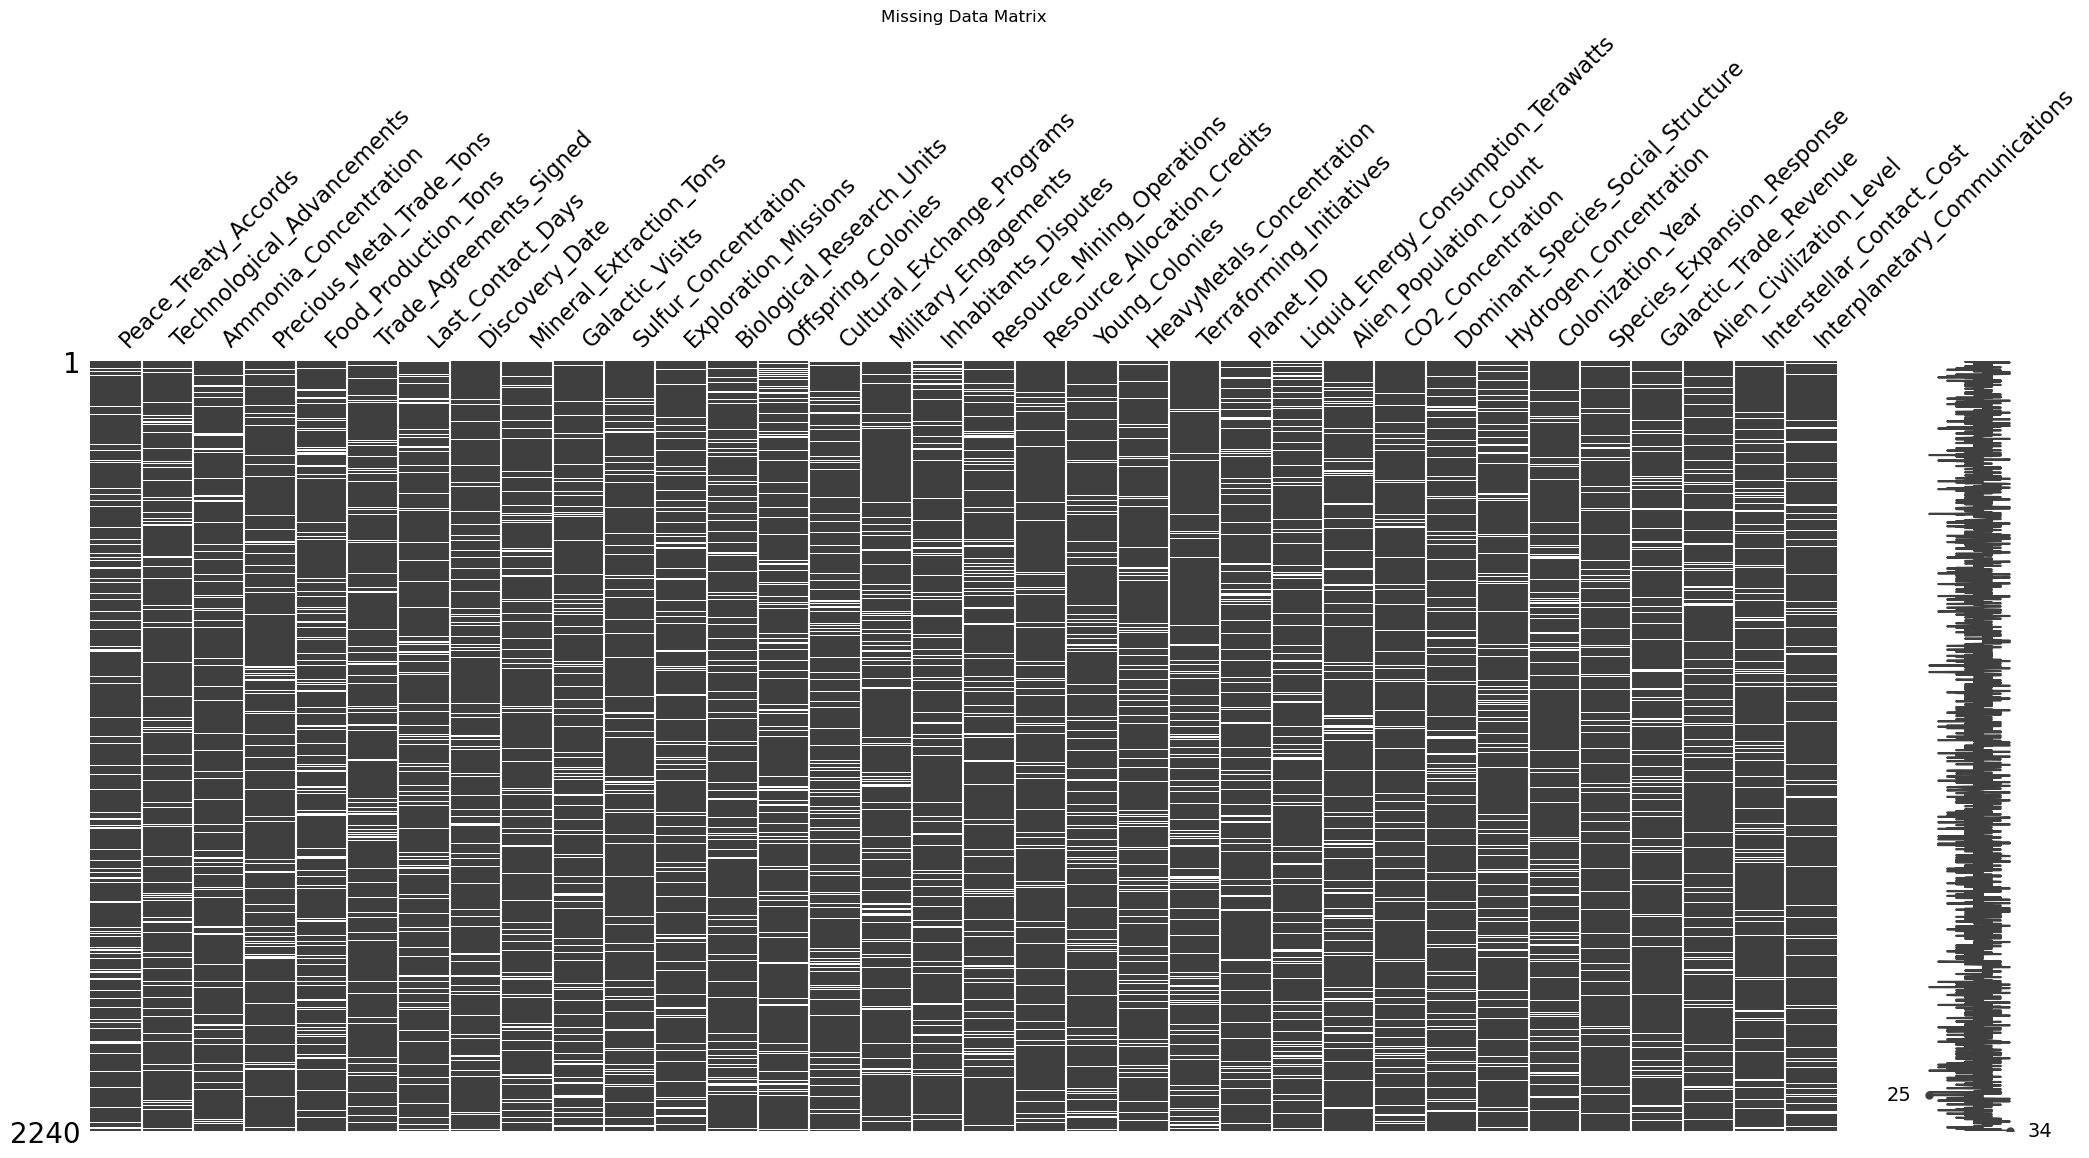

In [9]:
plt.figure(figsize=(6, 3))
msno.matrix(df)
plt.title("Missing Data Matrix")
plt.show()

Number of data rows

In [10]:
print(f'There are {df.shape[0]} rows.')

There are 2240 rows.


Number of NaN's per variable and relative percentage, the next cell shows a graphical representation.

In [11]:
nan_counts = df.isna().sum()
nan_counts_df = nan_counts.to_frame(name='NaN_Count')
nan_counts_df = nan_counts_df.reset_index()
nan_counts_df.columns = ['Variable', 'NaN_Count']
nan_counts_df['Relative'] = nan_counts_df['NaN_Count'] / df.shape[0]
nan_counts_df = nan_counts_df.sort_values(by='Relative', ascending=False)
nan_counts_df = nan_counts_df.reset_index(drop=True)
print(nan_counts_df)

                               Variable  NaN_Count  Relative
0                     Colonization_Year        260  0.116071
1                Galactic_Trade_Revenue        257  0.114732
2   Liquid_Energy_Consumption_Terawatts        248  0.110714
3                  Food_Production_Tons        246  0.109821
4                Alien_Population_Count        241  0.107589
5                    Offspring_Colonies        238  0.106250
6                  Peace_Treaty_Accords        235  0.104911
7                     Last_Contact_Days        234  0.104464
8     Dominant_Species_Social_Structure        233  0.104018
9                Hydrogen_Concentration        231  0.103125
10           Resource_Mining_Operations        231  0.103125
11             Terraforming_Initiatives        230  0.102679
12                 Inhabitants_Disputes        229  0.102232
13                       Young_Colonies        226  0.100893
14                       Discovery_Date        226  0.100893
15        Interplanetary

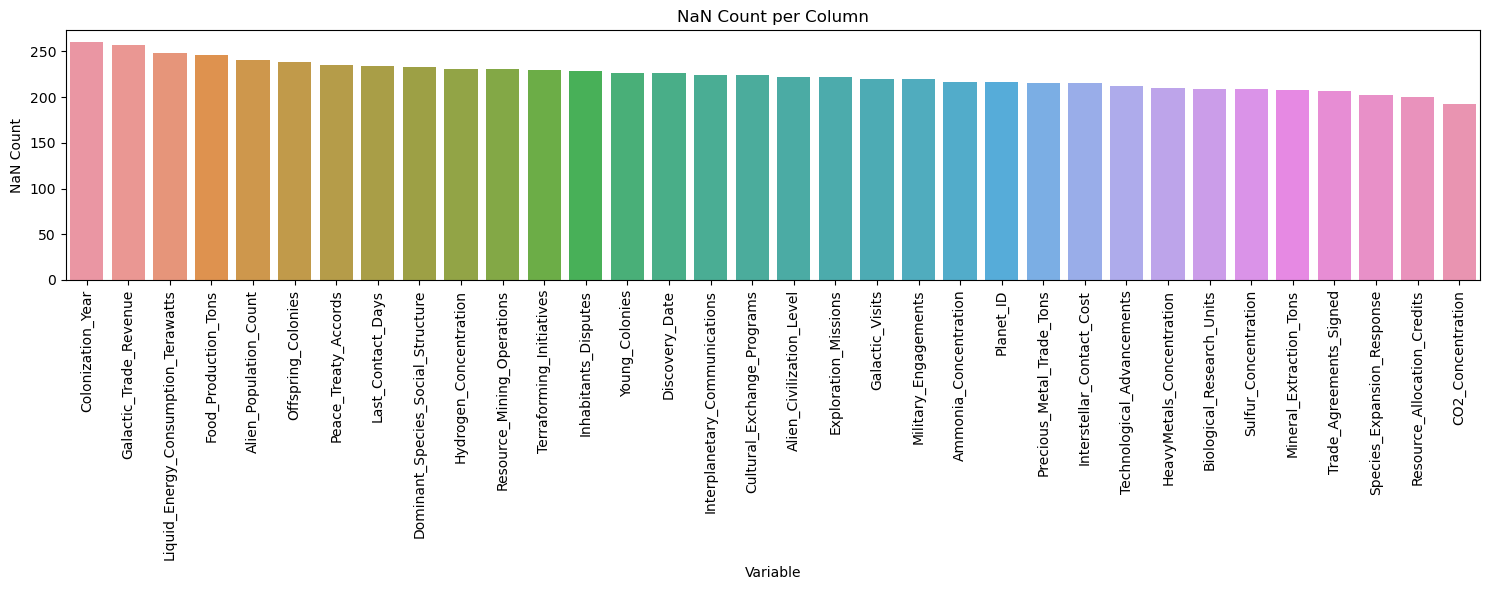

In [12]:
# Set the figure size
plt.figure(figsize=(15, 6))

# Create a bar plot
sns.barplot(data=nan_counts_df, x='Variable', y='NaN_Count', order=nan_counts_df['Variable'])

# Set labels and title
plt.xlabel("Variable")
plt.ylabel("NaN Count")
plt.title("NaN Count per Column")

# Rotate x-axis labels if needed
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Are there rows who do not miss any value?

In [13]:
complete_rows = df.dropna().shape[0]
total_rows = df.shape[0]

print(f'The percentage of rows without empty values is: {round(complete_rows/total_rows, 2)}%')

The percentage of rows without empty values is: 0.03%


*Only 0.03% of the rows is complete, so we will have to predict some NaN's to make sure we have usefull data. We will go over the variables, check their distributions, correlations and drop the columns which we don't need.*

Drop some columns, we will do this in a new dataframe, as such we still have the data when need it afterwards.
Columns we will drop:
* Planet_ID: not relevant for clustering
* Galactic_Trade_Revenue: This variable has constant value '11', so it is not relevant for the clustering.
* Interstellar_Contact_Cost: This variable has constant value '3', so it is not relevant for the clustering.

In [14]:
df_in_progress = df.drop(['Planet_ID', 'Galactic_Trade_Revenue', 'Interstellar_Contact_Cost'], axis=1)
df_in_progress

,Peace_Treaty_Accords,Technological_Advancements,Ammonia_Concentration,Precious_Metal_Trade_Tons,Food_Production_Tons,Trade_Agreements_Signed,Last_Contact_Days,Discovery_Date,Mineral_Extraction_Tons,Galactic_Visits,...,Terraforming_Initiatives,Liquid_Energy_Consumption_Terawatts,Alien_Population_Count,CO2_Concentration,Dominant_Species_Social_Structure,Hydrogen_Concentration,Colonization_Year,Species_Expansion_Response,Alien_Civilization_Level,Interplanetary_Communications
0,0.0,0.0,1.0,40.0,107.0,1.0,13.0,26-02-2030,391.0,3.0,...,0.0,647.0,78285.0,10.0,Married,98.55,3118.0,NaN,Master,6.0
1,0.0,0.0,2.0,108.0,49.0,1.0,NaN,29-11-2028,NaN,2.0,...,0.0,581.0,62772.0,10.0,Single,66.36,3099.0,0.0,Master,5.0
2,NaN,0.0,1.0,161.0,53.0,NaN,61.0,22-03-2029,363.0,5.0,...,0.0,726.0,69016.0,5.0,Married,25.23,3100.0,0.0,Graduation,8.0
3,0.0,0.0,1.0,107.0,NaN,3.0,NaN,15-01-2030,53.0,7.0,...,0.0,314.0,43795.0,NaN,Together,44.59,3098.0,1.0,Master,7.0
4,0.0,0.0,0.0,29.0,59.0,7.0,24.0,06-08-2029,177.0,3.0,...,0.0,290.0,57957.0,8.0,Together,90.67,3089.0,0.0,Graduation,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0.0,0.0,2.0,7.0,0.0,1.0,NaN,NaN,14.0,5.0,...,0.0,8.0,35924.0,2.0,Together,71.60,3099.0,0.0,Master,1.0
2236,0.0,0.0,2.0,8.0,0.0,2.0,39.0,27-11-2029,NaN,5.0,...,0.0,56.0,47472.0,9.0,Together,NaN,3096.0,0.0,PhD,2.0
2237,0.0,0.0,1.0,4.0,4.0,2.0,0.0,28-09-2029,61.0,4.0,...,NaN,140.0,62499.0,5.0,Together,62.52,3109.0,0.0,NaN,3.0
2238,0.0,0.0,1.0,149.0,47.0,1.0,92.0,01-10-2029,197.0,4.0,...,0.0,202.0,49767.0,2.0,Single,47.32,3121.0,0.0,Graduation,5.0


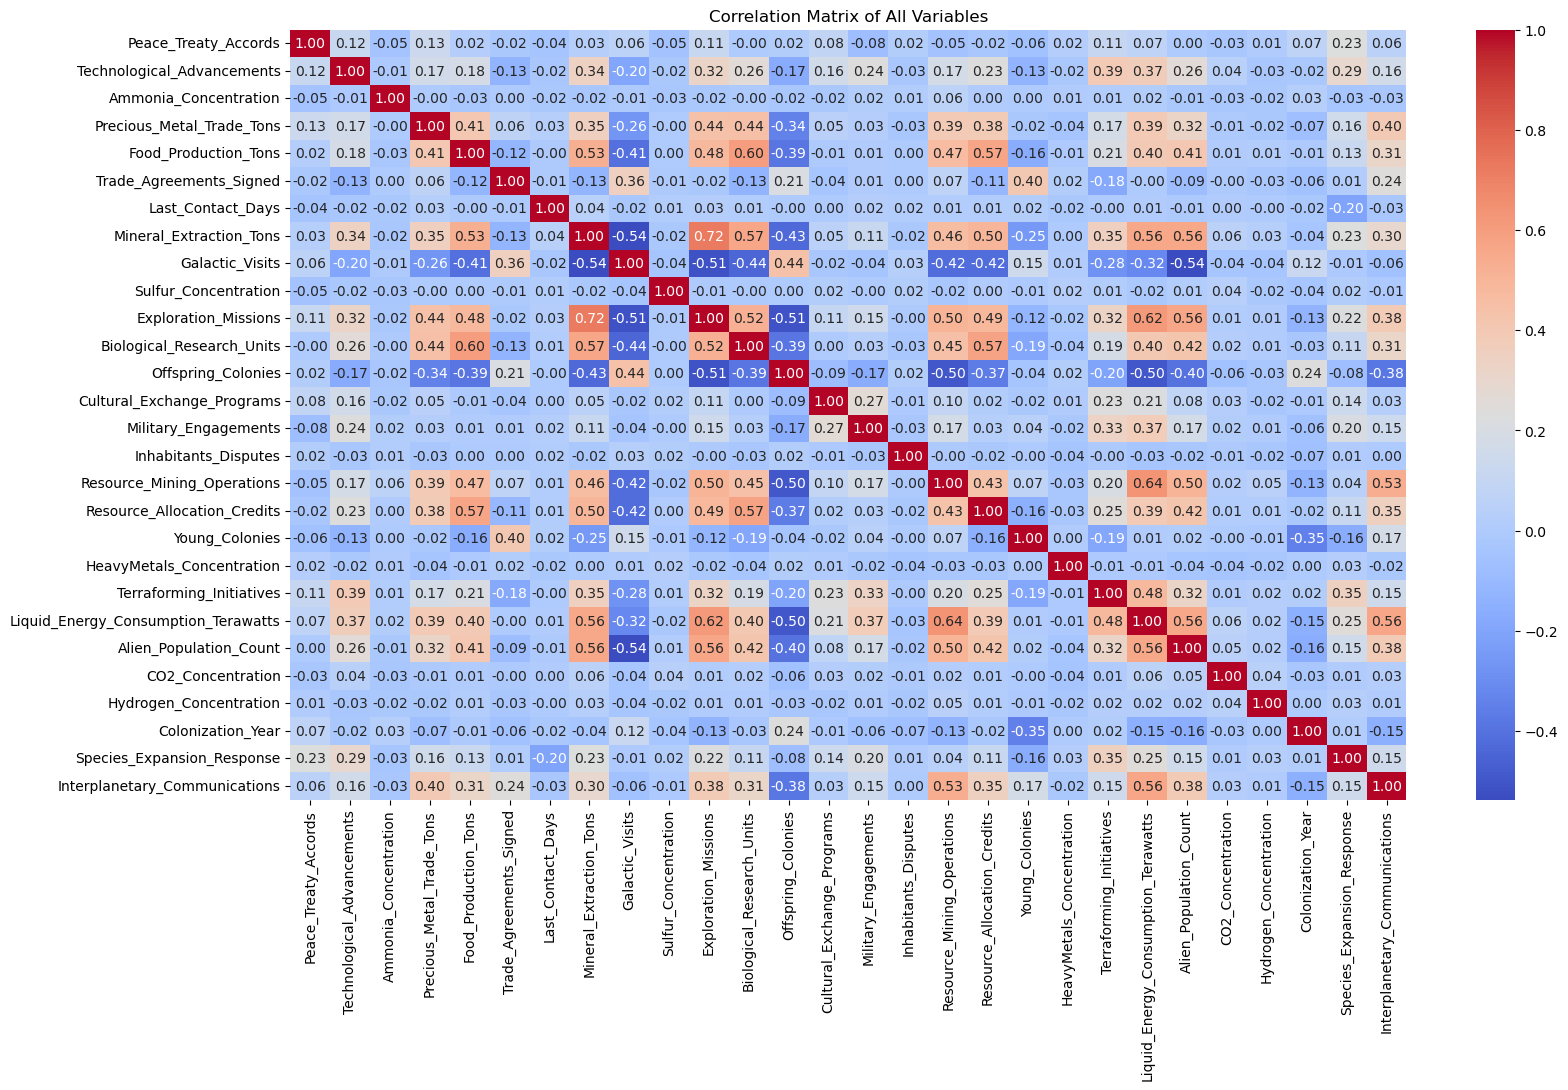

In [15]:
numeric_data = df_in_progress.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(18, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of All Variables")
plt.show()

In [16]:
def high_correlations(df, threshold=0.5):
    correlation_matrix = df.corr()

    result = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i + 1, len(correlation_matrix.columns)):
            corr_value = correlation_matrix.iloc[i, j]
            if abs(corr_value) > threshold:
                result.append({
                    'Variable 1': correlation_matrix.columns[i],
                    'Variable 2': correlation_matrix.columns[j],
                    'Correlation': abs(corr_value)
                })

    correlation_df = pd.DataFrame(result)
    correlation_df = correlation_df.sort_values(by='Correlation', ascending=False)
    correlation_df = correlation_df.reset_index(drop=True)

    return correlation_df

In [17]:
correlation_df = high_correlations(df_in_progress)
correlation_df

/var/folders/yv/cljqrj8s42j40lvx9b9s7b_c0000gn/T/ipykernel_5436/3921503884.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


,Variable 1,Variable 2,Correlation
0,Mineral_Extraction_Tons,Exploration_Missions,0.723468
1,Resource_Mining_Operations,Liquid_Energy_Consumption_Terawatts,0.639129
2,Exploration_Missions,Liquid_Energy_Consumption_Terawatts,0.615159
3,Food_Production_Tons,Biological_Research_Units,0.599803
4,Biological_Research_Units,Resource_Allocation_Credits,0.574609
5,Food_Production_Tons,Resource_Allocation_Credits,0.569224
6,Mineral_Extraction_Tons,Biological_Research_Units,0.567399
7,Exploration_Missions,Alien_Population_Count,0.564253
8,Liquid_Energy_Consumption_Terawatts,Interplanetary_Communications,0.562423
9,Liquid_Energy_Consumption_Terawatts,Alien_Population_Count,0.558047


In [18]:
# df_in_progress['Discovery_Date'] = pd.to_datetime(df_in_progress['Discovery_Date'], errors='coerce')
# df_in_progress['Discovery_Date'] = df_in_progress['Discovery_Date'].dt.to_period('M')
# df_in_progress.drop('Discovery_Date', axis=1)
# df_in_progress

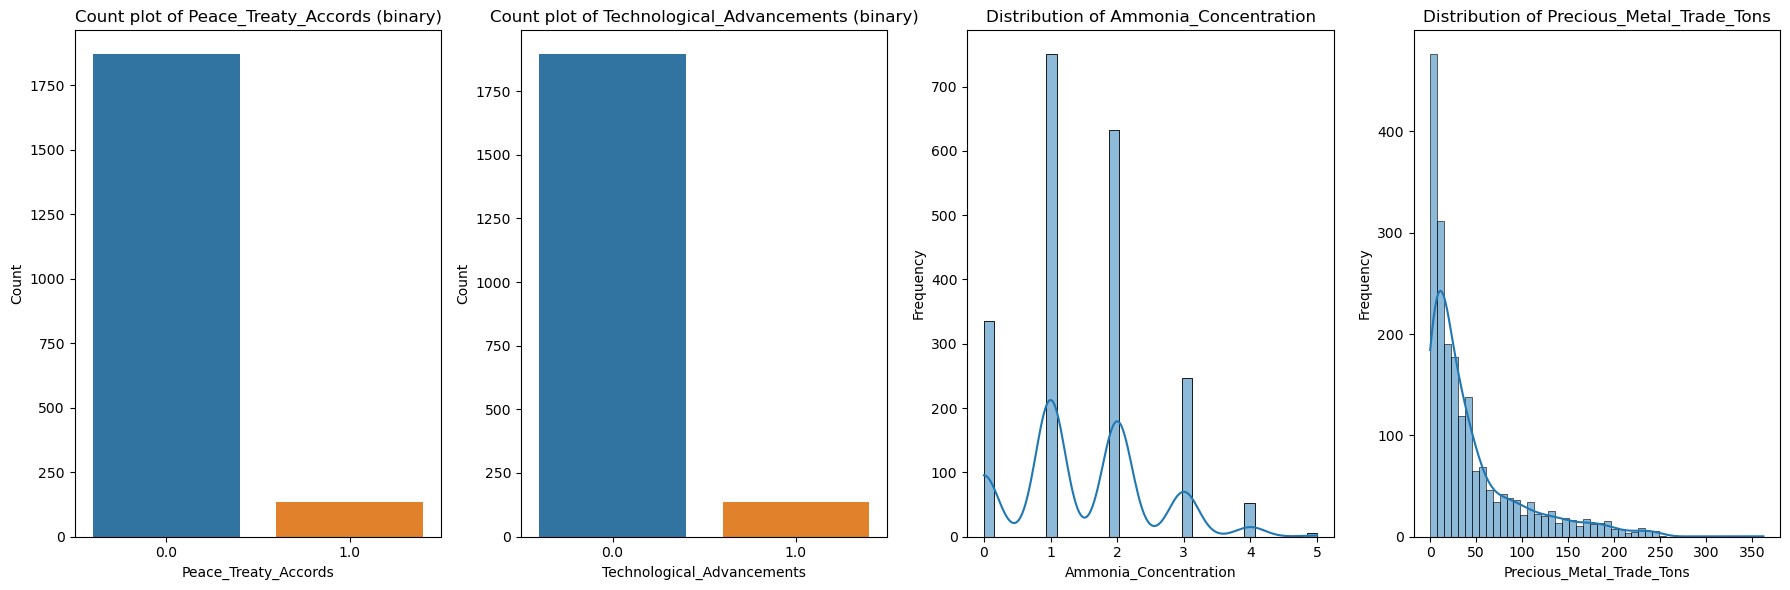

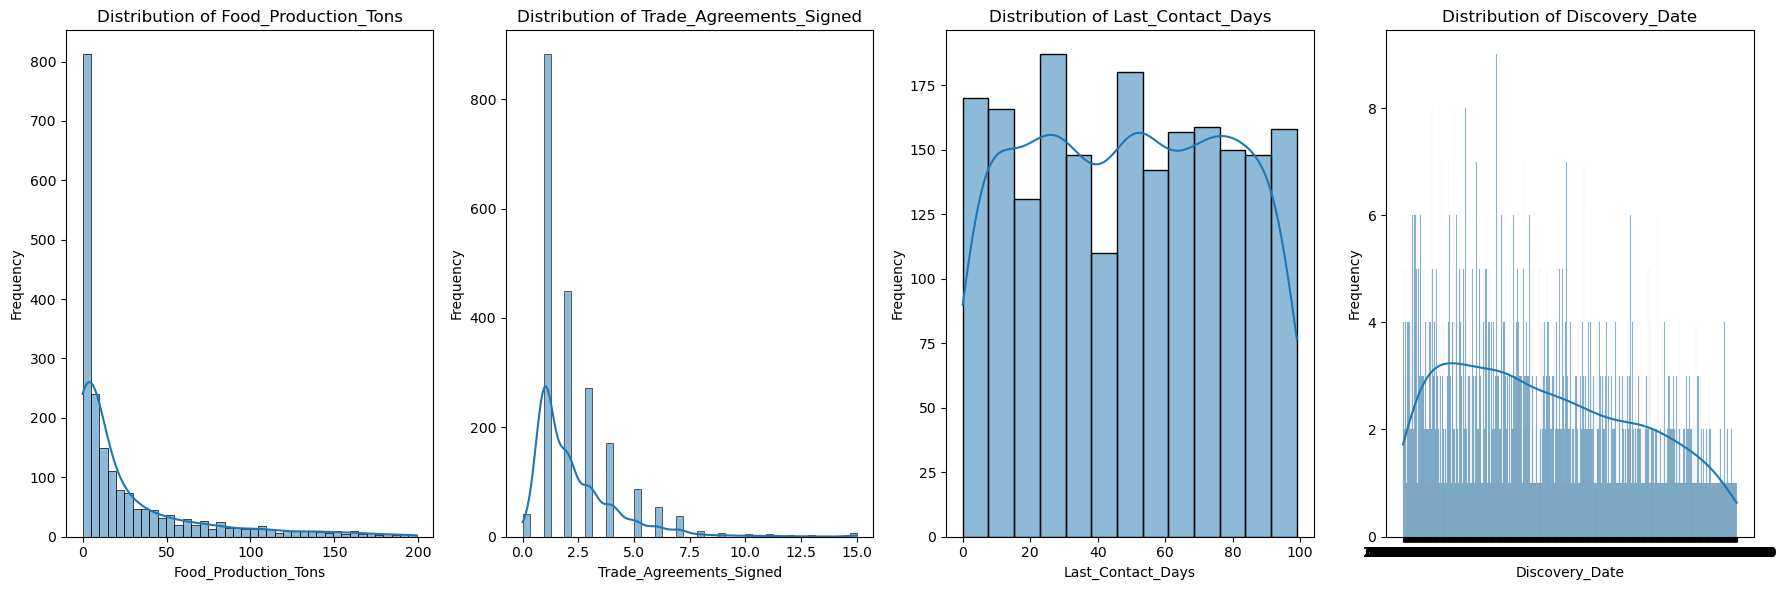

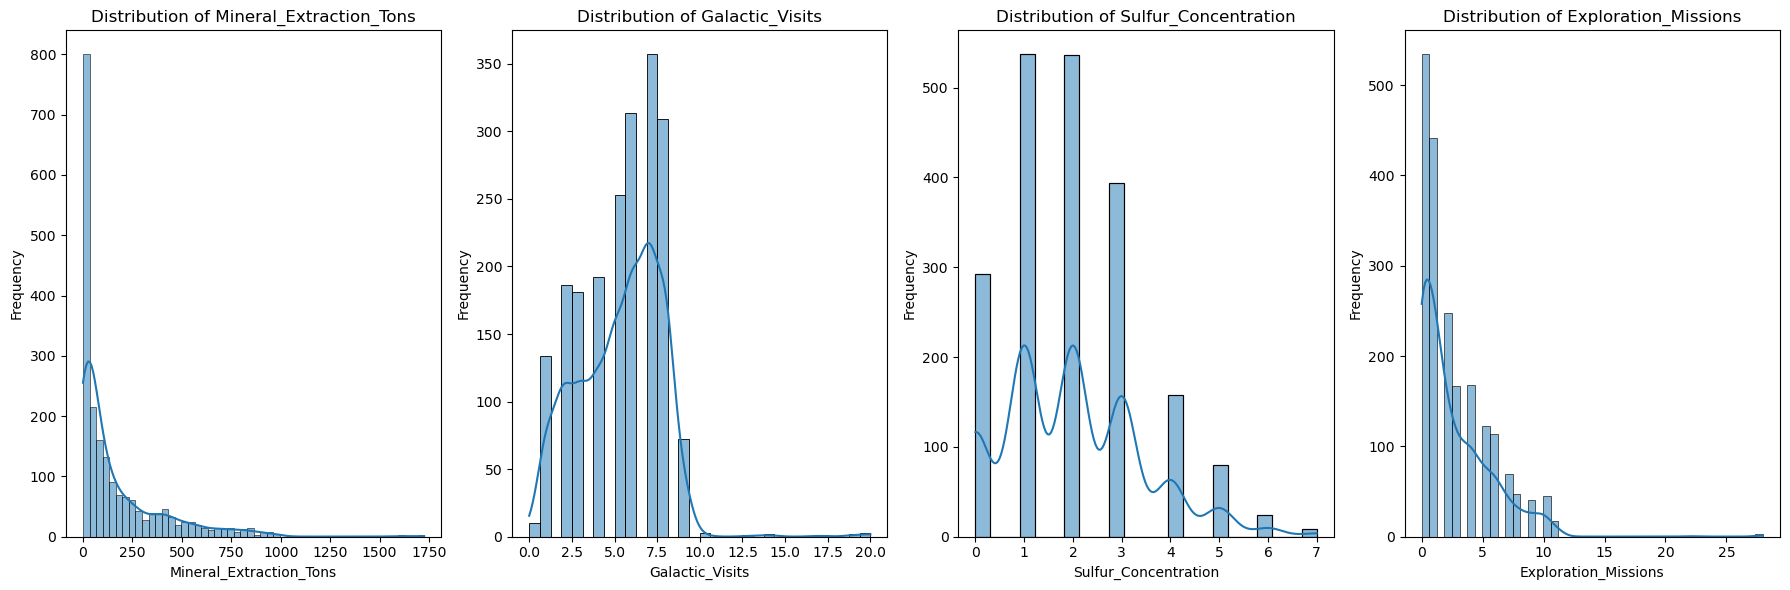

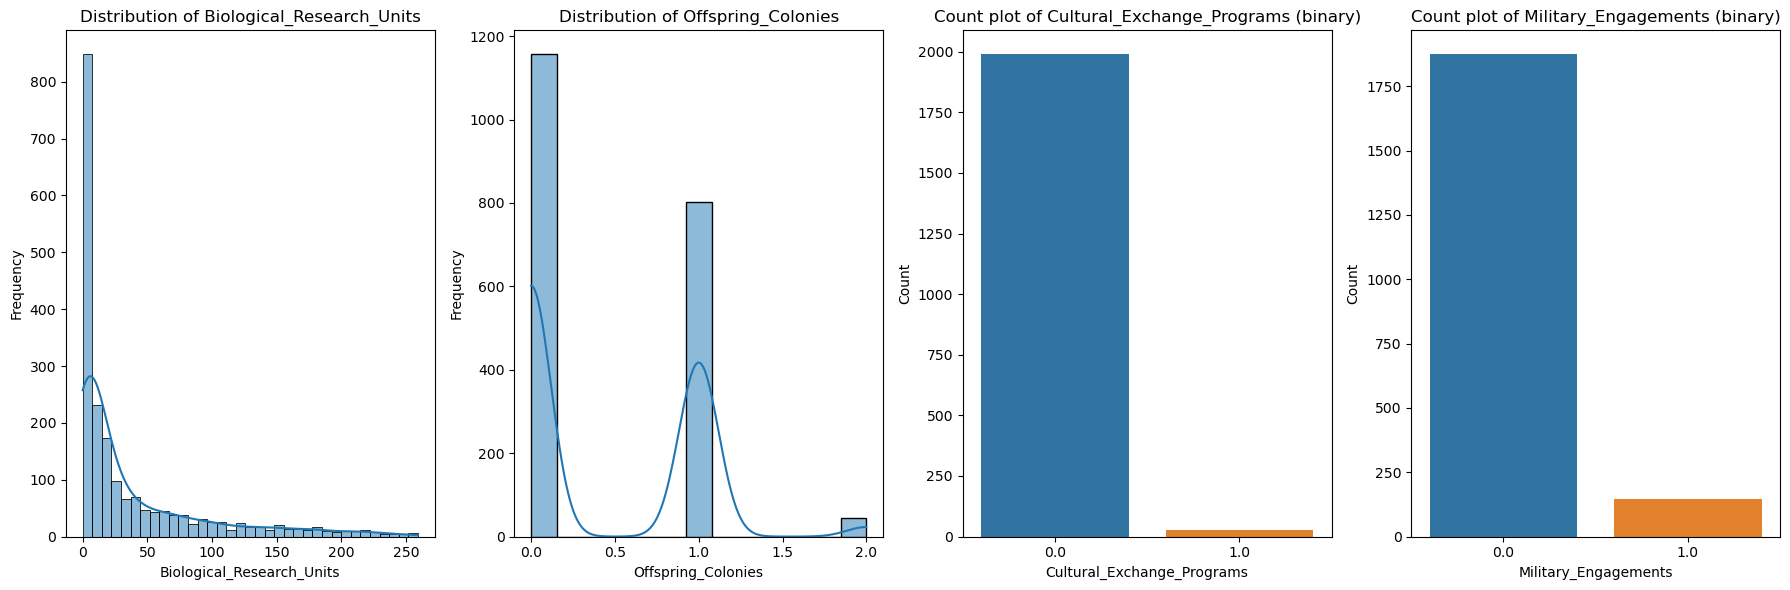

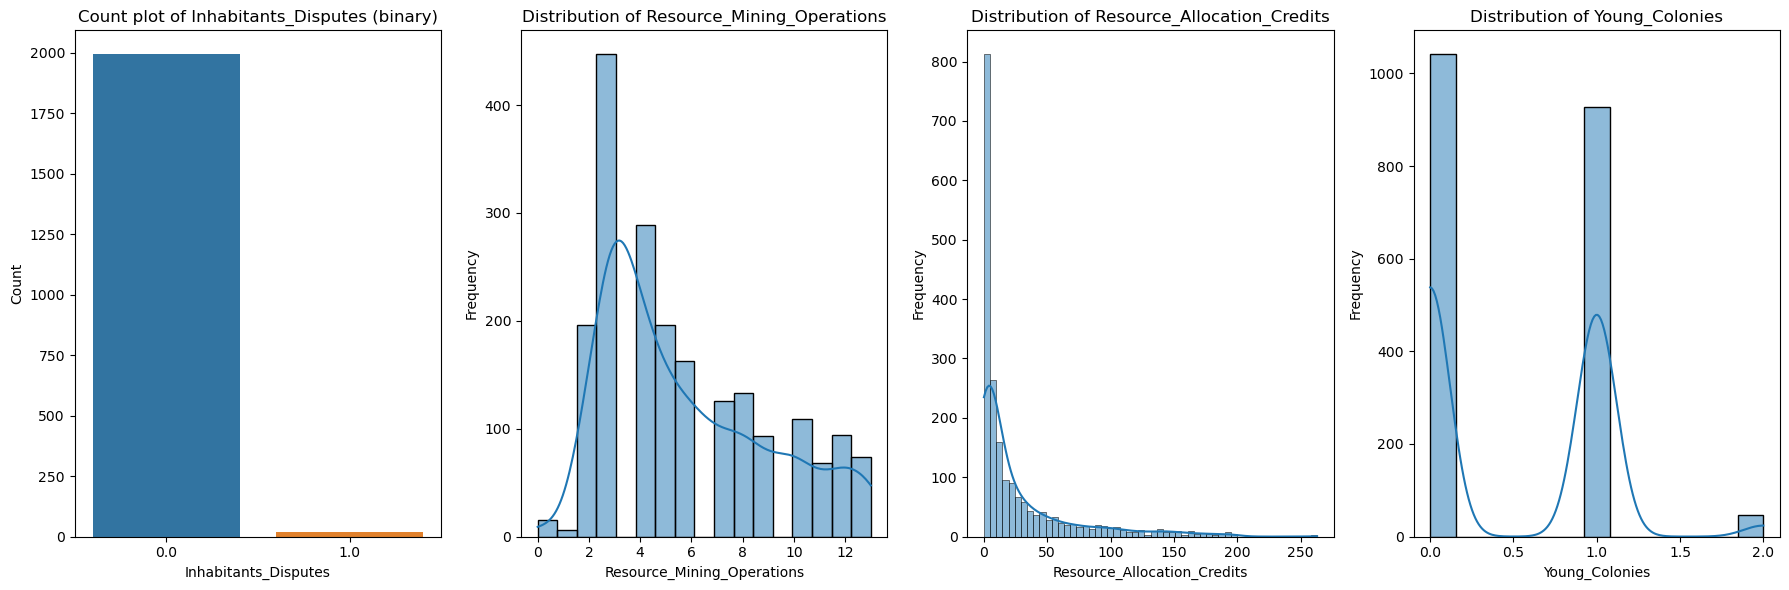

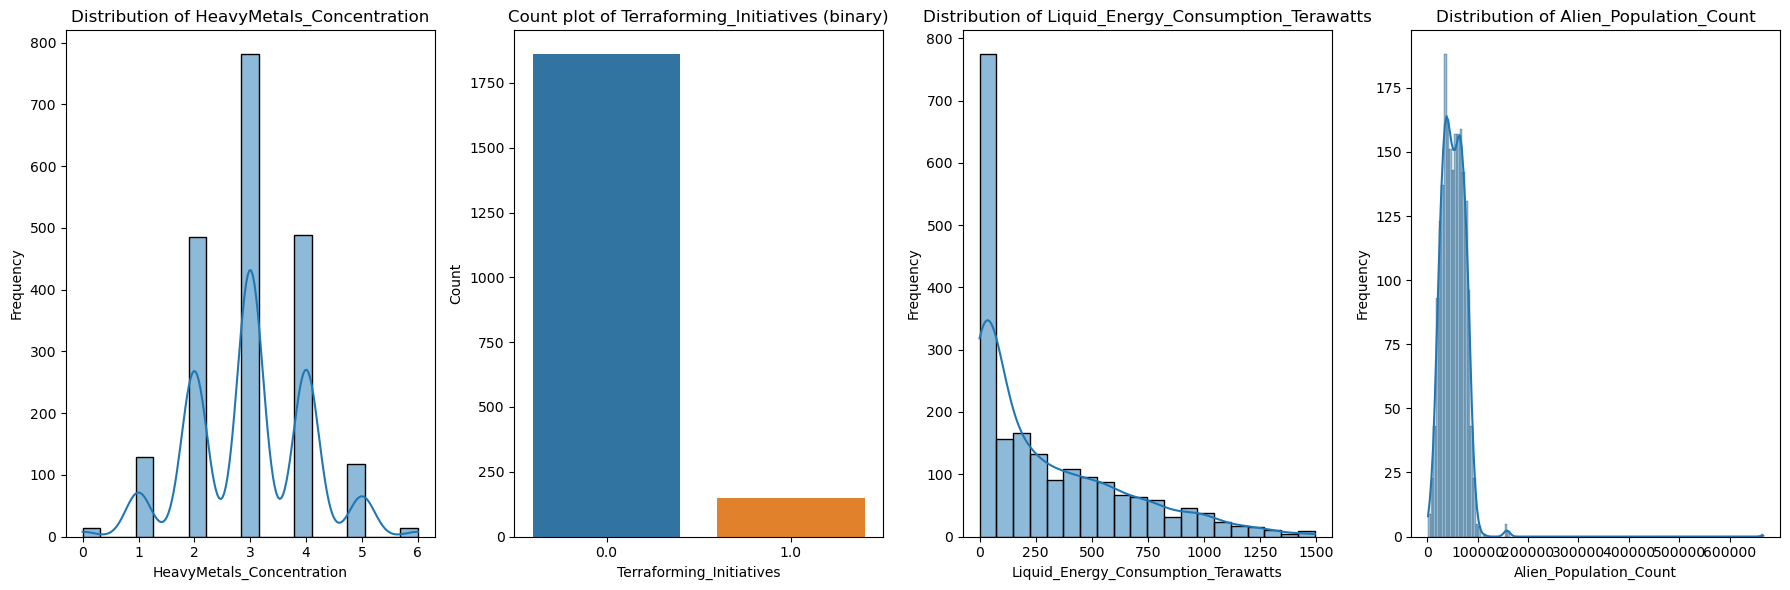

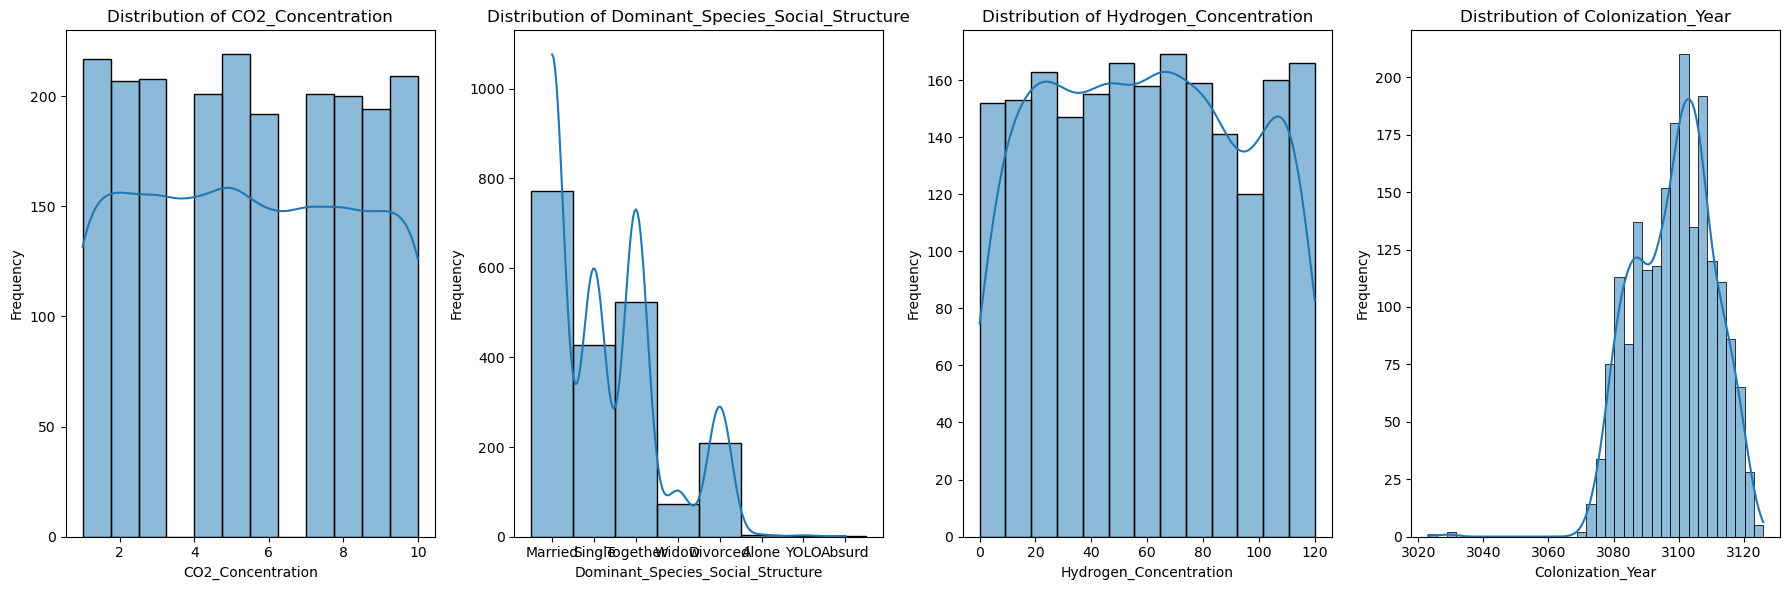

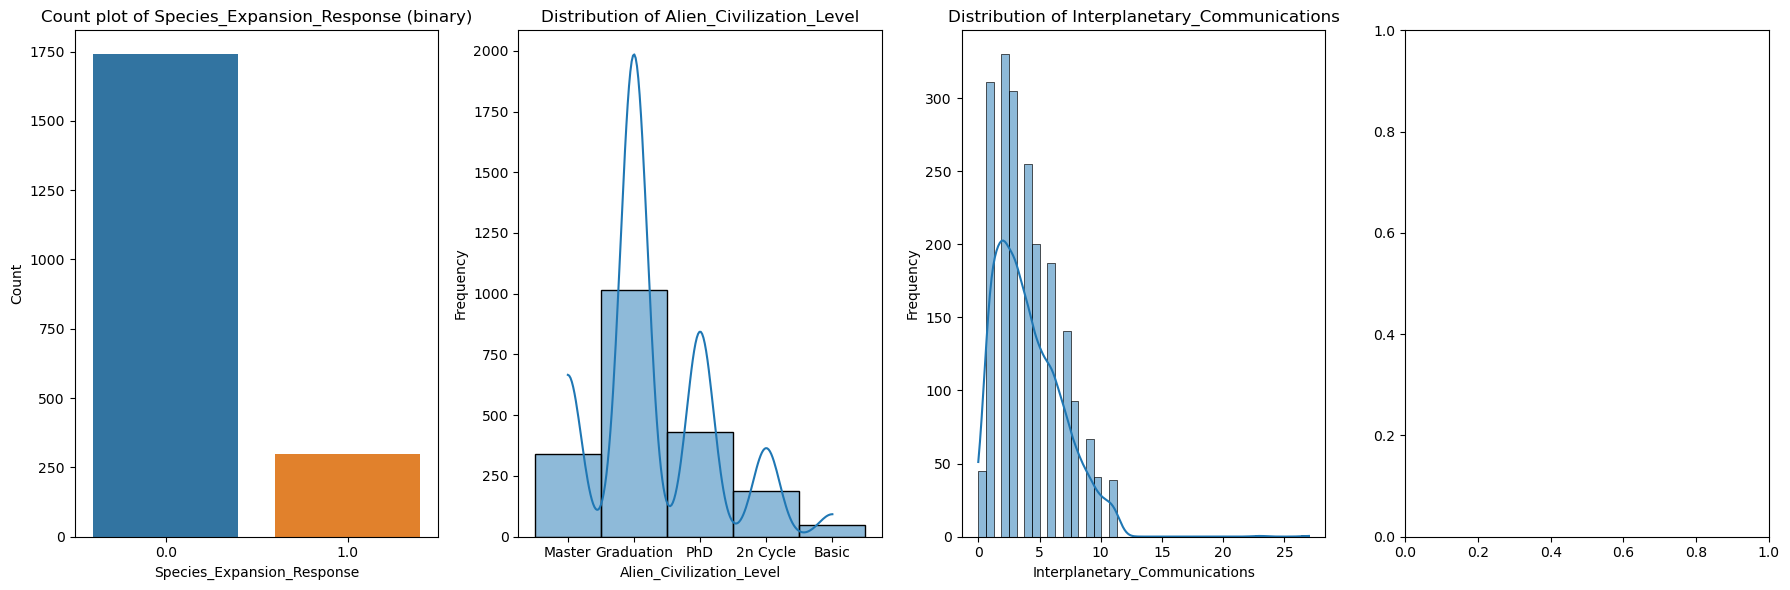

In [20]:
plots_per_row = 4
columns = df_in_progress.columns

for i in range(0, len(columns), plots_per_row):
    remaining_columns = len(columns) - i
    
    if remaining_columns == 2:
        fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    elif remaining_columns == 1:
        fig, ax = plt.subplots(1, 1, figsize=(6, 6))
    else:
        fig, axes = plt.subplots(1, plots_per_row, figsize=(18, 6))
    
    for j, column in enumerate(columns[i:i+plots_per_row]):
        if remaining_columns == 1:
            if df[column].nunique() <= 2:
                sns.countplot(x=df_in_progress[column], ax=ax)
                ax.set_title(f'Count plot of {column} (binary)')
                ax.set_xlabel(column)
                ax.set_ylabel('Count')
            else:
                sns.histplot(df_in_progress[column], kde=True, ax=ax)
                ax.set_title(f'Distribution of {column}')
                ax.set_xlabel(column)
                ax.set_ylabel('Frequency')
        else:
            if df[column].nunique() <= 2:
                sns.countplot(x=df_in_progress[column], ax=axes[j])
                axes[j].set_title(f'Count plot of {column} (binary)')
                axes[j].set_xlabel(column)
                axes[j].set_ylabel('Count')
            else:
                sns.histplot(df_in_progress[column], kde=True, ax=axes[j])
                axes[j].set_title(f'Distribution of {column}')
                axes[j].set_xlabel(column)
                axes[j].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()